# 1) PATTERN OVER TIME

In [2]:
import pandas as pd

In [5]:
import os

# Specify the file name
filename = 'divorce.csv'

# Search for the file starting from the root directory
for root, dirs, files in os.walk('/'):
    if filename in files:
        file_path = os.path.join(root, filename)
        break

print(file_path)




/System/Volumes/Data/Users/nuratiqamohdfouzy/Downloads/divorce.csv


In [34]:
divorce = pd.read_csv('/System/Volumes/Data/Users/nuratiqamohdfouzy/Downloads/divorce.csv')

In [9]:
divorce.head()

,divorce_date,dob_man,education_man,income_man,dob_woman,education_woman,income_woman,marriage_date,marriage_duration,num_kids
0,2006-09-06,1975-12-18,Secondary,2000.0,1983-08-01,Secondary,1800.0,2000-06-26,5.0,1.0
1,2008-01-02,1976-11-17,Professional,6000.0,1977-03-13,Professional,6000.0,2001-09-02,7.0,NaN
2,2011-01-02,1969-04-06,Preparatory,5000.0,1970-02-16,Professional,5000.0,2000-02-02,2.0,2.0
3,2011-01-02,1979-11-13,Secondary,12000.0,1981-05-13,Secondary,12000.0,2006-05-13,2.0,NaN
4,2011-01-02,1982-09-20,Professional,6000.0,1988-01-30,Professional,10000.0,2007-08-06,3.0,NaN


## a) Importing DateTime Data

In [35]:
#Check data type first. Date column and dob column are wrong.
divorce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   divorce_date       2209 non-null   object 
 1   dob_man            2209 non-null   object 
 2   education_man      2209 non-null   object 
 3   income_man         2209 non-null   float64
 4   dob_woman          2209 non-null   object 
 5   education_woman    2209 non-null   object 
 6   income_woman       2209 non-null   float64
 7   marriage_date      2209 non-null   object 
 8   marriage_duration  2209 non-null   float64
 9   num_kids           1333 non-null   float64
dtypes: float64(4), object(6)
memory usage: 172.7+ KB


In [36]:
#Other way to check data type.
divorce.dtypes

divorce_date          object
dob_man               object
education_man         object
income_man           float64
dob_woman             object
education_woman       object
income_woman         float64
marriage_date         object
marriage_duration    float64
num_kids             float64
dtype: object

In [37]:
#Change the data type from object to datetime. 
divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])
divorce["divorce_date"] = pd.to_datetime(divorce["divorce_date"])
divorce["dob_man"] = pd.to_datetime(divorce["dob_man"])
divorce["dob_woman"] = pd.to_datetime(divorce["dob_woman"])

In [38]:
divorce.dtypes

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object

-- We can use code below BEFORE we import data --


divorce = pd.read_csv("divorce.csv", parse_dates = ["marriage_date"])
divorce.dtypes


-- This is how you update data type AFTER import data

divorce["marriage_date"] = pd.to_datetime(divorce["marriage_date"])
divorce.dtypes

Why this is important? Why import datetime?

- Great for analysis such as looking at pattern over years, months, or even days of the week. 

## b) Creating Datetime Data

In [52]:
#First, we create dataframe with year, month, day, marriage_duration column.

record = {'month': [6,2],
           'day': [26, 2],
           'year': [2000, 2000],
           'marriage_duration': [5.0,2.0]}

df = pd.DataFrame(record)
df

,month,day,year,marriage_duration
0,6,26,2000,5.0
1,2,2,2000,2.0


In [53]:
#Now we create datetime with new column named marriage_date
df["marriage_date"] = pd.to_datetime(df[["month", "day","year"]])
df

,month,day,year,marriage_duration,marriage_date
0,6,26,2000,5.0,2000-06-26
1,2,2,2000,2.0,2000-02-02


In [57]:
#Check data types.
df.dtypes

month                         int64
day                           int64
year                          int64
marriage_duration           float64
marriage_date        datetime64[ns]
marriage_month                int64
marriage_day                  int64
marriage_year                 int64
dtype: object

## c) Extract parts of full date

In [54]:
# Extract month from date
df["marriage_month"] = df["marriage_date"].dt.month
df[["day", "year","marriage_duration", "marriage_date", "marriage_month"]]

,day,year,marriage_duration,marriage_date,marriage_month
0,26,2000,5.0,2000-06-26,6
1,2,2000,2.0,2000-02-02,2


In [55]:
# Extract day from date 
df["marriage_day"] = df["marriage_date"].dt.day
df[["month", "year","marriage_duration", "marriage_date", "marriage_day"]]

,month,year,marriage_duration,marriage_date,marriage_day
0,6,2000,5.0,2000-06-26,26
1,2,2000,2.0,2000-02-02,2


In [56]:
# Extract day from year
df["marriage_year"] = df["marriage_date"].dt.year
df[["day", "month","marriage_duration", "marriage_date", "marriage_year"]]

,day,month,marriage_duration,marriage_date,marriage_year
0,26,6,5.0,2000-06-26,2000
1,2,2,2.0,2000-02-02,2000


In [94]:
df["weekday"] = df["marriage_date"].dt.weekday
df

,month,day,year,marriage_duration,marriage_date,marriage_month,marriage_day,marriage_year,weekday,name_of_day
0,6,26,2000,5.0,2000-06-26,6,26,2000,0,Monday
1,2,2,2000,2.0,2000-02-02,2,2,2000,2,Wednesday


In [93]:
#Add day name column for easy understanding (Weekday: 0 = Monday, 1 = Tuesday and so on)
df["name_of_day"] = df["marriage_date"].dt.strftime('%A')
df

,month,day,year,marriage_duration,marriage_date,marriage_month,marriage_day,marriage_year,weekday,name_of_day
0,6,26,2000,5.0,2000-06-26,6,26,2000,0,Monday
1,2,2,2000,2.0,2000-02-02,2,2,2000,2,Wednesday


## d) Visualizing Patterns Over Time

In [12]:
# Update the divorce dataframe and add marriage_month first.
# Extract month from date and add marriage_month column.
divorce["marriage_month"] = divorce["marriage_date"].dt.month.astype(int)
divorce

,marriage_date,marriage_duration,marriage_month
0,2000-06-26,5.0,6
1,2000-02-02,2.0,2
2,1991-10-19,10.0,10
3,1993-01-02,10.0,1
4,1998-12-11,7.0,12


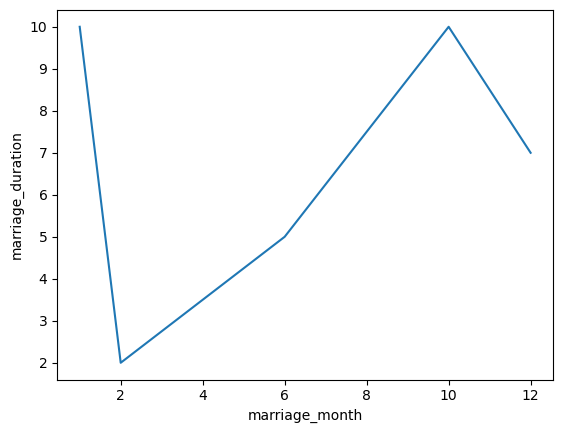

In [13]:
#Create line plot 
sns.lineplot(data=divorce, x="marriage_month", y="marriage_duration")
plt.show()

# 2) CORRELATION

## a) Function for correlation

In [40]:
divorce.select_dtypes("number").corr()

,income_man,income_woman,marriage_duration,num_kids
income_man,1.000000,0.318047,0.085321,0.040848
income_woman,0.318047,1.000000,0.078677,-0.018015
marriage_duration,0.085321,0.078677,1.000000,0.447358
num_kids,0.040848,-0.018015,0.447358,1.000000


## b) Correlation Heatmaps

In [41]:
import seaborn as sns

/var/folders/jg/khdd77ms5r94dqnz22kvrxlc0000gn/T/ipykernel_36514/2596902523.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(divorce.corr(), annot = True)


<Axes: >

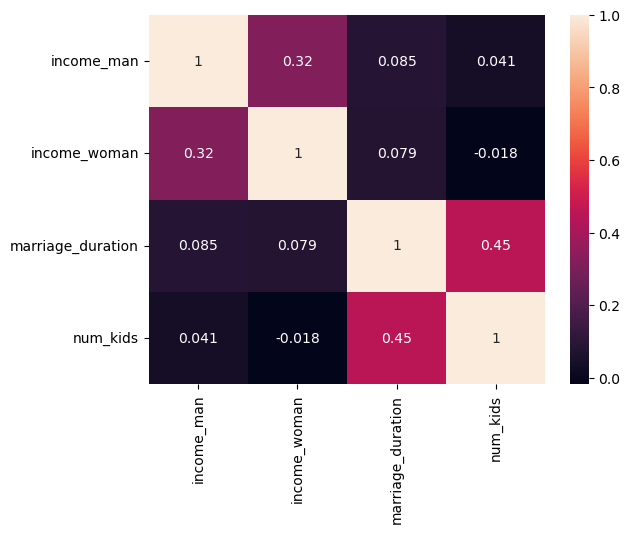

In [44]:
sns.heatmap(divorce.corr(), annot = True)

## c) Complement correlation calculation with scatter plot. 

In [46]:
import matplotlib.pyplot as plt

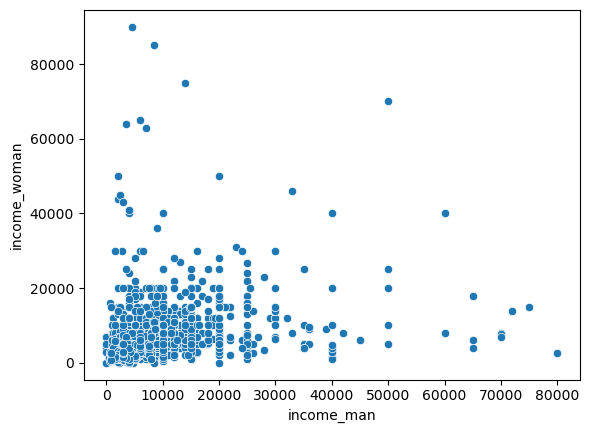

In [47]:
#From the below scatter plot, we can see that the relationship exist but not really strong just as heatmap suggested 
#where correlation is 0.32. 
sns.scatterplot(data = divorce, x="income_man", y="income_woman")
plt.show()

## d) Pairplots

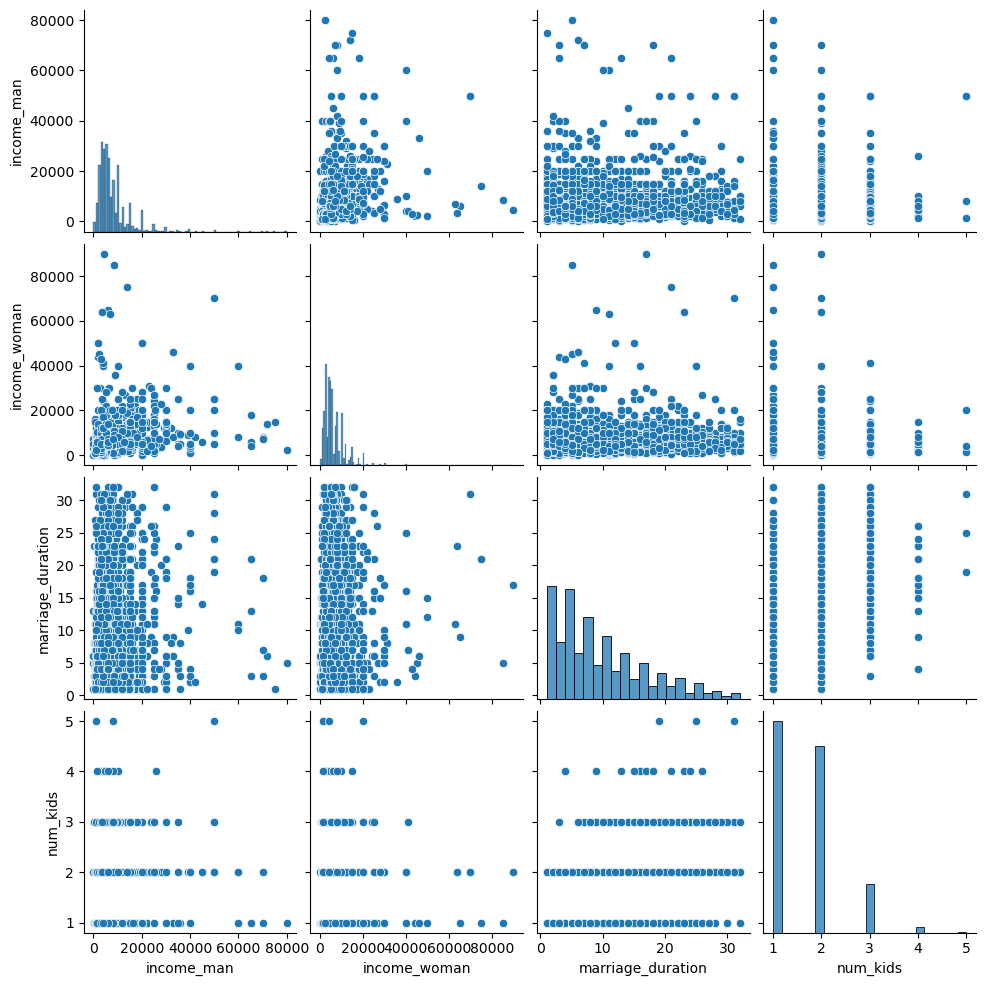

In [49]:
sns.pairplot(data=divorce)
plt.show()

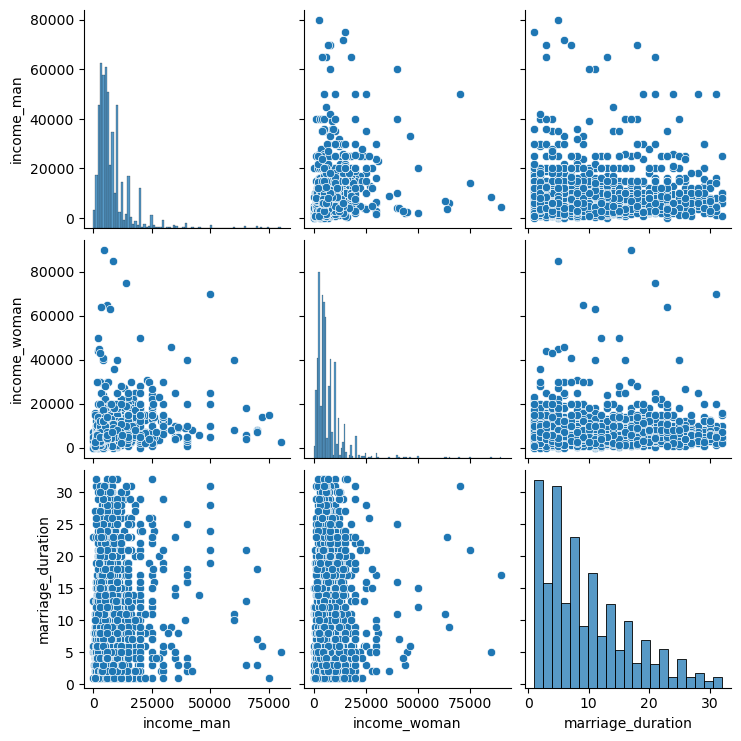

In [50]:
#limit the number of plotted relationships by setting vars argument equal to the variable of interest.
sns.pairplot(data=divorce, vars = ["income_man","income_woman","marriage_duration"])
plt.show()

From the above pairplot, we can see that income and duration of marriage have fairly weak relationships with each other. 